# Import Library

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import matplotlib.image as mpimg
from skimage import data

# Read Image

In [85]:
##modul scikit-image (skimage) untuk menghasilkan gambar yang menggambarkan tekstur bulan.
image = data.moon()

# Penerapan Histogram Equalization (HE)

In [86]:
#fungsi equalizeHist() dari modul OpenCV untuk melakukan ekualisasi histogram dan disimpan dalam variabel image.
#gambar yang telah diekualisasi histogram disimpan dalam variabel image_equalized
image_equalized = cv2.equalizeHist(image)

#  Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)

In [87]:
#fungsi createCLAHE() digunakan untuk membuat objek CLAHE
#dengan parameter clipLimit (menentukan batas klipping yaitu 2) dan tileGridSize (digunakan ukuran grid (8, 8))
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))

#Apply CLAHE to the original image
image_clahe = clahe.apply(image)

# Penerapan metode Contrast Stretching (CS)

In [88]:
# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')

# Apply Min-Max Contrasting
min = np.min(image)
max = np.max(image)

# perulangan for, setiap piksel dalam gambar dihitung ulang nilainya menggunakan rumus Min-Max Contrasting.
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)

# Penerapan Metode Perkalian Konstanta

In [89]:
# menyalin gambar Moon, lalu diubah type data menjadi float
copyMoon = image.copy().astype(float)

# variabel m1 dan n1 menentukan dimensi gambar salinan
m1,n1 = copyMoon.shape
output1 = np.empty([m1, n1])

# perulangan for, setiap piksel dalam gambar salinan dikalikan dengan faktor 1.9 
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyMoon[baris, kolom] * 1.9

# Plot Image

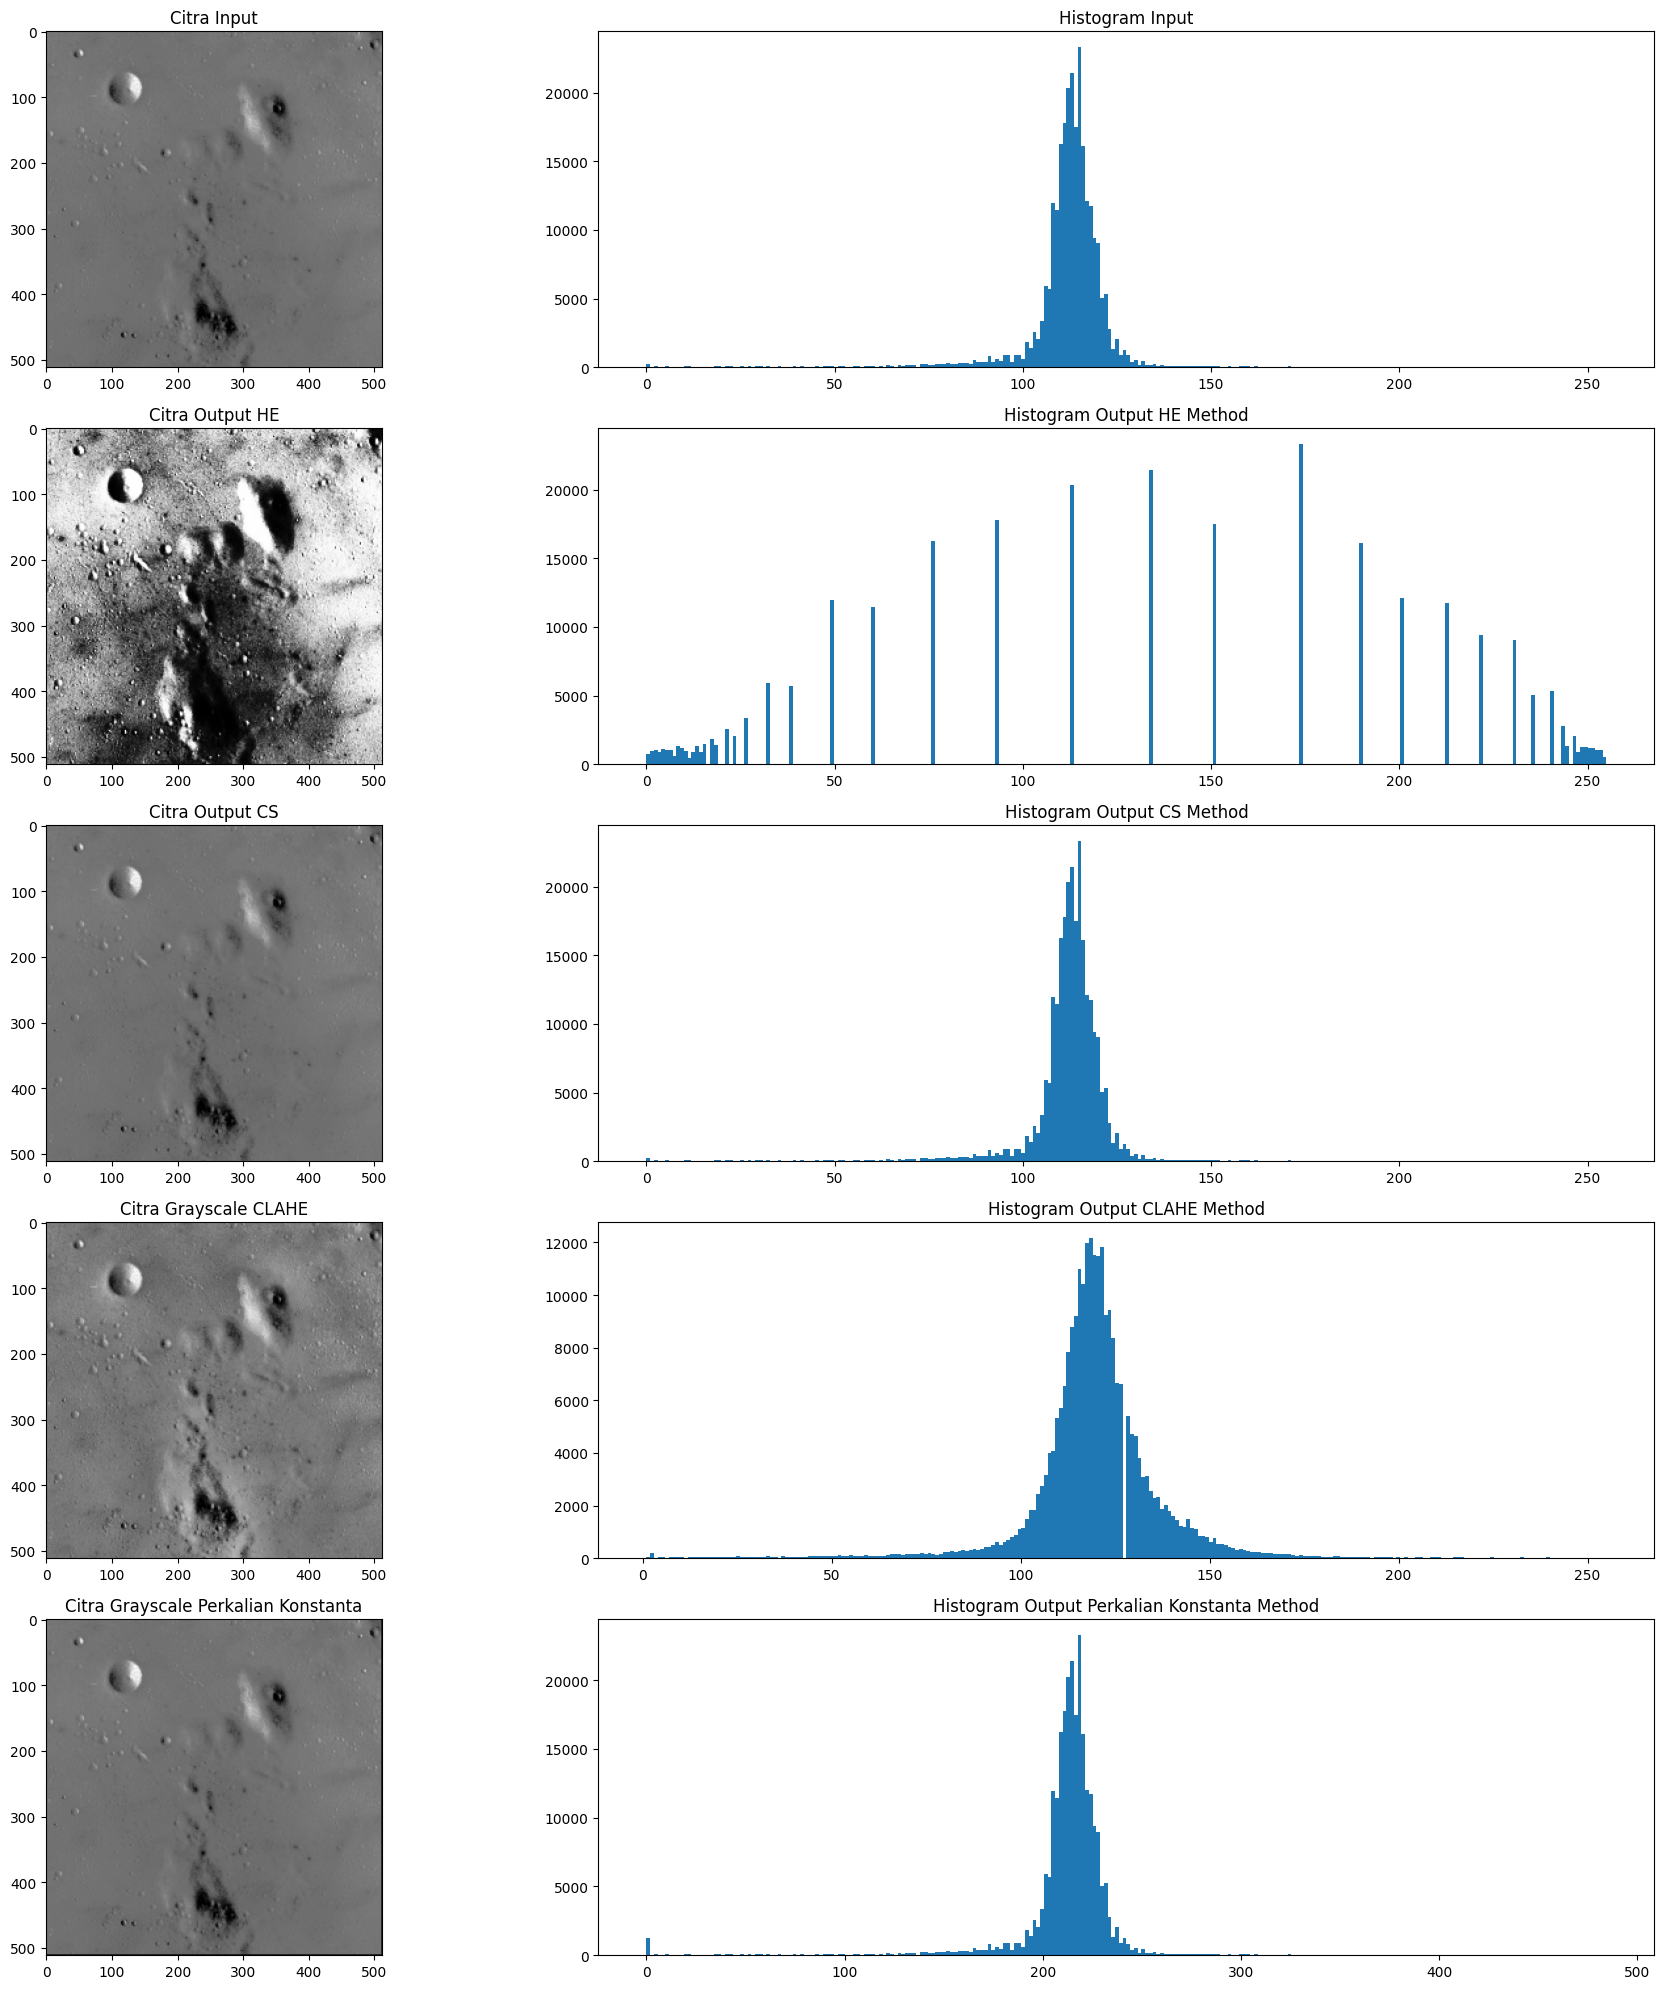

In [90]:
# Menampilkan gambar dengan 5 baris dan 2 kolom, dengan ukuran 20x20
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel() # dibuat untuk mengakses setiap gambar secara terpisah.

# Menampilkan Gambar asli dan histogramnya
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')

# Menampilkan gambar hasil metode Histogram Equalization (HE)
ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

# Menampilkan gambar hasil pemrosesan menggunakan metode Min-Max Contrasting (CS)
ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

# Menampilkan gambar hasil pemrosesan menggunakan metode (CLAHE) 
ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

# Menampilkan gambar hasil pemrosesan menggunakan metode Perkalian Konstanta
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout()

